Training set shape: (60000, 28, 28)
Test set shape: (10000, 28, 28)
Class names: ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


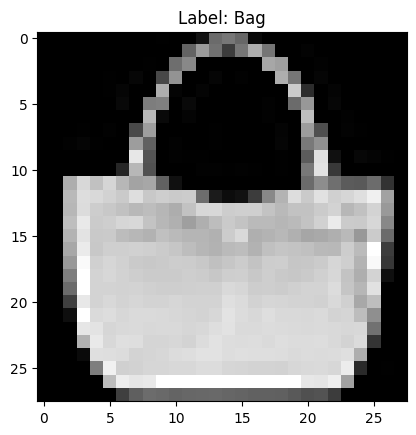

In [24]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import metrics
import seaborn as sns
from random import randrange
import matplotlib.animation as animation
from IPython.display import HTML, display
from graphviz import Digraph

# Load the Fashion MNIST dataset
fashion_data = keras.datasets.fashion_mnist
(X_train_fashion, y_train_fashion), (X_test_fashion, y_test_fashion) = fashion_data.load_data()

# Print shapes of the datasets
print(f"Training set shape: {X_train_fashion.shape}")
print(f"Test set shape: {X_test_fashion.shape}")

# Normalize the data
X_train_fashion = X_train_fashion.astype('float32') / 255
X_test_fashion = X_test_fashion.astype('float32') / 255

# Define class names
class_names_fashion = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]
print("Class names:", class_names_fashion)

# Display an example image and its label
plt.imshow(X_train_fashion[100], cmap='gray')
plt.title(f"Label: {class_names_fashion[y_train_fashion[100]]}")
plt.show()

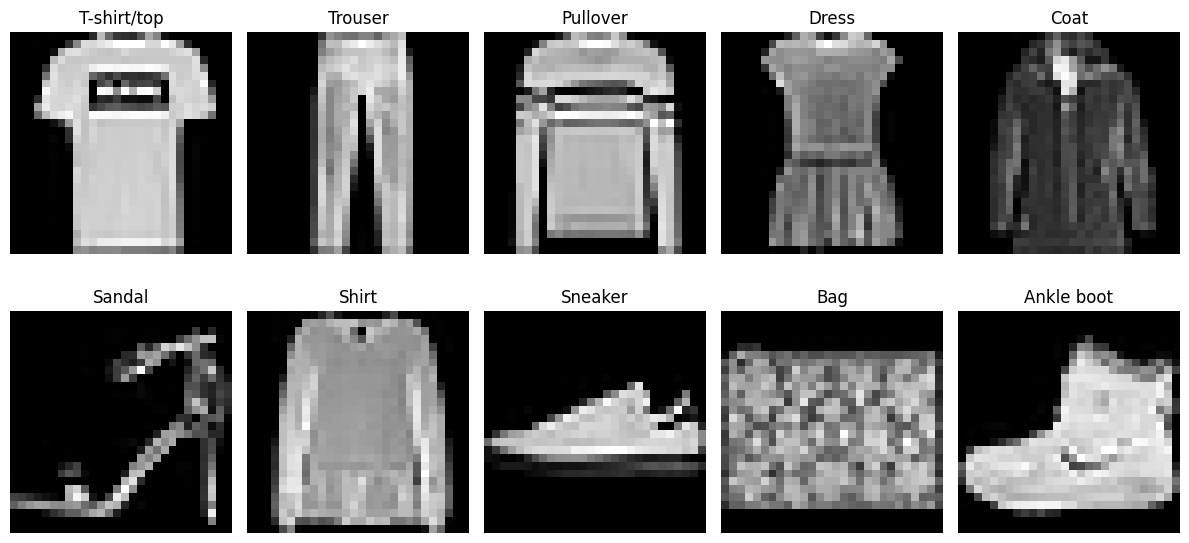

In [25]:
# Display a grid of images for each class
def display_class_images(X_data, y_data, class_names, num_classes=10):
    # Create a figure with a grid of subplots
    fig, axes = plt.subplots(2, 5, figsize=(12, 6))
    axes = axes.flatten()

    # Loop through each class
    for i in range(num_classes):
        # Find the first image of each class
        index = np.where(y_data == i)[0][0]
        image = X_data[index]

        # Display the image on the corresponding subplot
        axes[i].imshow(image, cmap='gray')
        axes[i].set_title(class_names[i])
        axes[i].axis('off')

    # Adjust layout
    plt.tight_layout()
    plt.show()

# Display a grid of images for each class
display_class_images(X_train_fashion, y_train_fashion, class_names_fashion)


In [26]:
# Function to create a combined summary DataFrame of the dataset
def create_combined_dataset_summary(y_train, y_test, class_names):
    # Count the number of samples for each class in the training and test datasets
    train_class_counts = np.bincount(y_train, minlength=len(class_names))
    test_class_counts = np.bincount(y_test, minlength=len(class_names))
    
    # Create a combined DataFrame with the class names and their counts for both datasets
    combined_summary_df = pd.DataFrame({
        'Class Name': class_names,
        'Training Count': train_class_counts,
        'Test Count': test_class_counts
    })
    
    return combined_summary_df

# Create and display the combined summary DataFrame for the training and test datasets
combined_summary_df = create_combined_dataset_summary(y_train_fashion, y_test_fashion, class_names_fashion)
print("Combined Dataset Summary:")
display(combined_summary_df)

Combined Dataset Summary:


,Class Name,Training Count,Test Count
0,T-shirt/top,6000,1000
1,Trouser,6000,1000
2,Pullover,6000,1000
3,Dress,6000,1000
4,Coat,6000,1000
5,Sandal,6000,1000
6,Shirt,6000,1000
7,Sneaker,6000,1000
8,Bag,6000,1000
9,Ankle boot,6000,1000


Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)


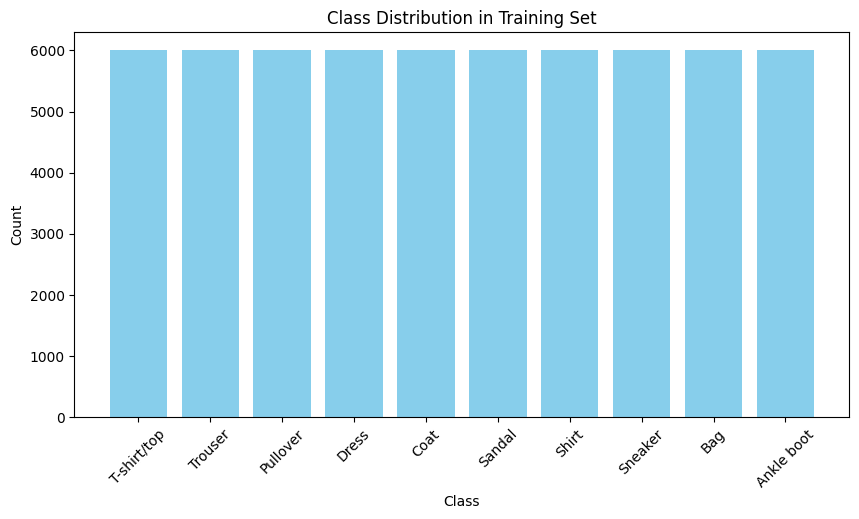

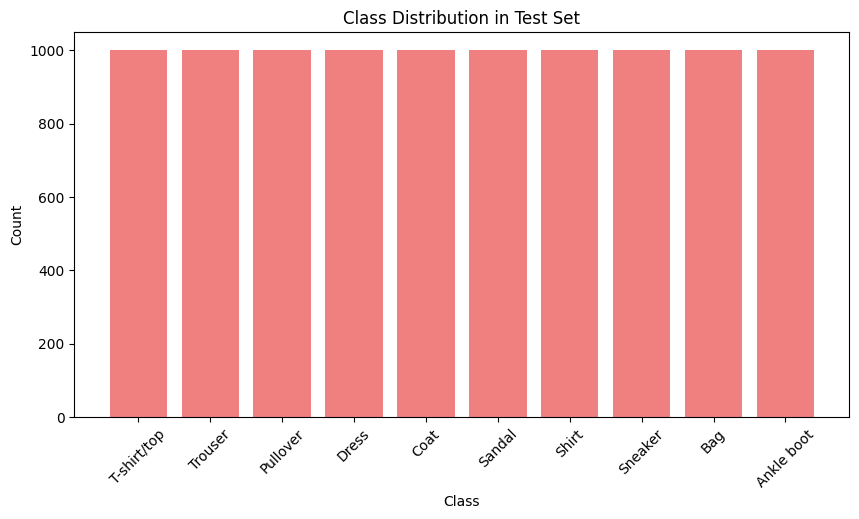

In [27]:
# Display some basic statistics
print("Training data shape:", X_train_fashion.shape)
print("Test data shape:", X_test_fashion.shape)

# Plot the distribution of classes in the training dataset
plt.figure(figsize=(10, 5))
plt.bar(class_names_fashion, np.bincount(y_train_fashion), color='skyblue')
plt.title('Class Distribution in Training Set')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Plot the distribution of classes in the test dataset
plt.figure(figsize=(10, 5))
plt.bar(class_names_fashion, np.bincount(y_test_fashion), color='lightcoral')
plt.title('Class Distribution in Test Set')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [28]:
# Define the Convolutional Neural Network (CNN)
fashion_CNN = keras.models.Sequential([
    keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

# Display the model's architecture
fashion_CNN.summary()

# Compile the model
fashion_CNN.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

# Reshape the data to include the channel dimension
X_train_fashion_CNN = X_train_fashion.reshape(-1, 28, 28, 1)
X_test_fashion_CNN = X_test_fashion.reshape(-1, 28, 28, 1)


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 128)         73856     
                                                                 
 flatten_1 (Flatten)         (None, 1152)             

In [30]:
class TrainingHistory(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        logs = logs or {}
        self.model.history.history.setdefault('loss', []).append(logs.get('loss'))
        self.model.history.history.setdefault('accuracy', []).append(logs.get('accuracy'))
        self.model.history.history.setdefault('val_loss', []).append(logs.get('val_loss'))
        self.model.history.history.setdefault('val_accuracy', []).append(logs.get('val_accuracy'))

# Train the CNN model with a validation split and custom callback
training_history = TrainingHistory()
fashion_CNN_history = fashion_CNN.fit(
    X_train_fashion_CNN, y_train_fashion, epochs=20, validation_split=0.2, callbacks=[training_history]
)

# Evaluate the CNN model on the test data
test_loss_fashion_CNN, test_accuracy_fashion_CNN = fashion_CNN.evaluate(X_test_fashion_CNN, y_test_fashion)
print(f"Test accuracy: {test_accuracy_fashion_CNN:.4f}")


Epoch 1/20
1500/1500 [==============================] - 13s 9ms/step - loss: 0.3510 - accuracy: 0.8719 - val_loss: 0.3548 - val_accuracy: 0.8688
Epoch 2/20
1500/1500 [==============================] - 14s 9ms/step - loss: 0.2879 - accuracy: 0.8934 - val_loss: 0.2858 - val_accuracy: 0.8943
Epoch 3/20
1500/1500 [==============================] - 14s 9ms/step - loss: 0.2529 - accuracy: 0.9065 - val_loss: 0.2782 - val_accuracy: 0.9013
Epoch 4/20
1500/1500 [==============================] - 13s 9ms/step - loss: 0.2246 - accuracy: 0.9161 - val_loss: 0.2605 - val_accuracy: 0.9015
Epoch 5/20
1500/1500 [==============================] - 13s 9ms/step - loss: 0.2000 - accuracy: 0.9259 - val_loss: 0.2562 - val_accuracy: 0.9090
Epoch 6/20
1500/1500 [==============================] - 13s 9ms/step - loss: 0.1774 - accuracy: 0.9335 - val_loss: 0.2903 - val_accuracy: 0.8957
Epoch 7/20
1500/1500 [==============================] - 13s 9ms/step - loss: 0.1631 - accuracy: 0.9382 - val_loss: 0.2631 - val_ac

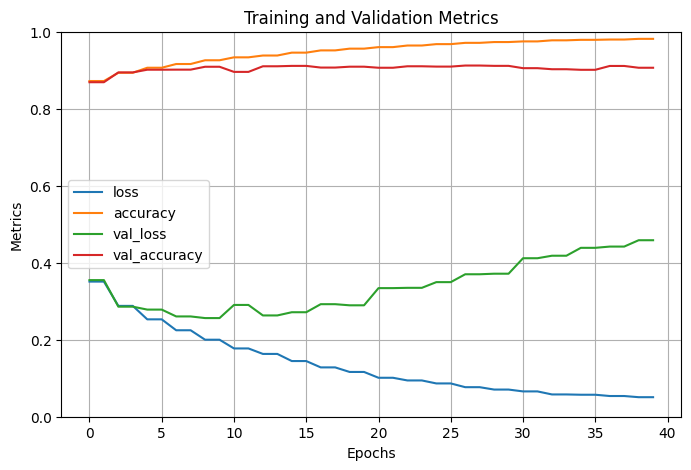

In [31]:
# Plot the training history
history_df_fashion = pd.DataFrame(fashion_CNN_history.history)
history_df_fashion.plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.title("Training and Validation Metrics")
plt.xlabel("Epochs")
plt.ylabel("Metrics")
plt.show()

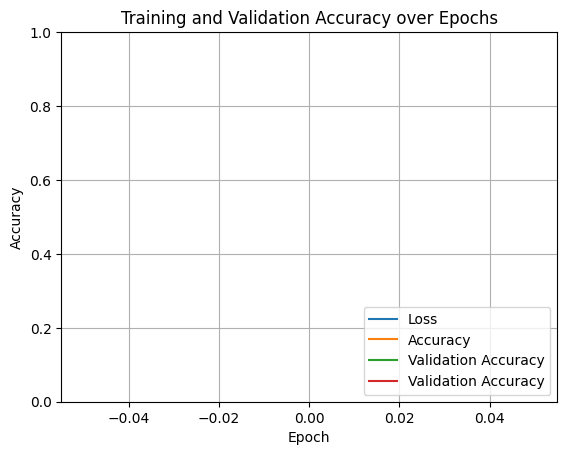

In [35]:
# Animate training process
def animate_training(i):
    plt.cla()
    plt.plot(fashion_CNN_history.history['loss'][:i+1], label='Loss')
    plt.plot(fashion_CNN_history.history['accuracy'][:i+1], label='Accuracy')    
    plt.plot(fashion_CNN_history.history['val_loss'][:i+1], label='Validation Accuracy')
    plt.plot(fashion_CNN_history.history['val_accuracy'][:i+1], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy over Epochs')
    plt.ylim([0, 1])
    plt.grid(True)

fig = plt.figure()
ani = animation.FuncAnimation(fig, animate_training, frames=len(fashion_CNN_history.history['accuracy']), interval=500, repeat=False)
HTML(ani.to_jshtml())

In [36]:
# Make predictions on the test set
fashion_predictions = fashion_CNN.predict(X_test_fashion_CNN)

# Convert predictions to class labels
predicted_classes_fashion = np.argmax(fashion_predictions, axis=1)


313/313 [==============================] - 1s 3ms/step


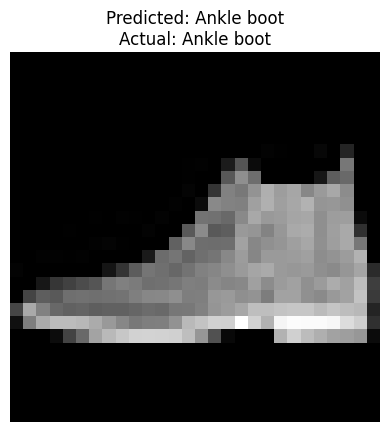

In [10]:
# Animate predictions
def animate_predictions(i):
    plt.cla()
    plt.imshow(X_test_fashion_CNN[i].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {class_names_fashion[predicted_classes_fashion[i]]}\nActual: {class_names_fashion[y_test_fashion[i]]}")
    plt.axis('off')

fig = plt.figure()
ani = animation.FuncAnimation(fig, animate_predictions, frames=20, interval=1000, repeat=False)
HTML(ani.to_jshtml())

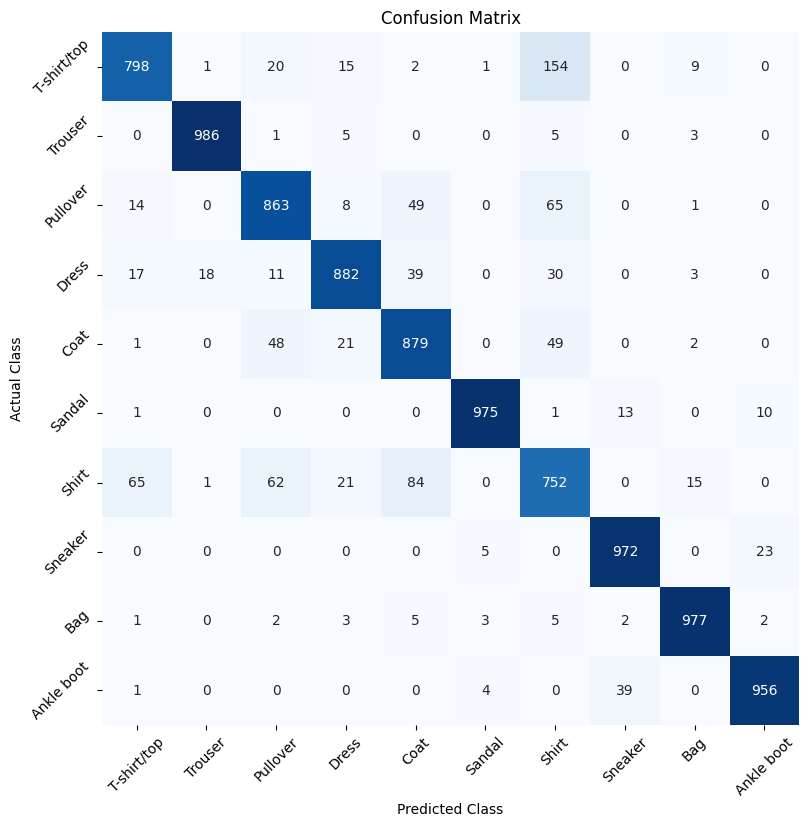

In [37]:
# Compute and plot the confusion matrix
confusion_matrix_fashion = metrics.confusion_matrix(y_test_fashion, predicted_classes_fashion)
plt.figure(figsize=(9, 9))
sns.heatmap(confusion_matrix_fashion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix")
plt.ylabel("Actual Class")
plt.xlabel("Predicted Class")
plt.xticks(np.arange(10) + 0.5, class_names_fashion, rotation=45)
plt.yticks(np.arange(10) + 0.5, class_names_fashion, rotation=45)
plt.show()

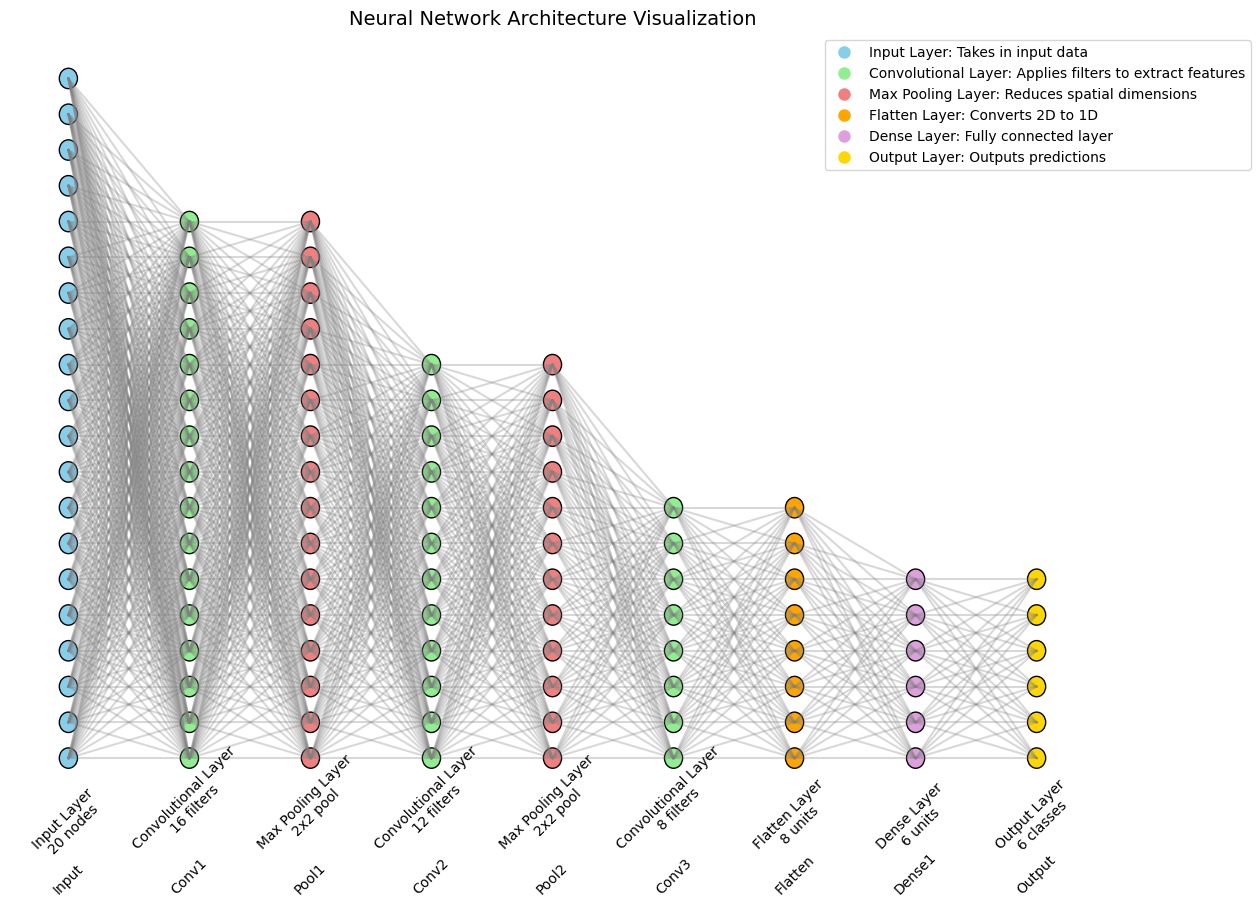

In [38]:
import matplotlib.pyplot as plt
import numpy as np

# Define a neural network structure for visualization with doubled nodes
layers = [
    {'type': 'input', 'nodes': 20, 'description': 'Input Layer\n20 nodes', 'short_name': 'Input'},
    {'type': 'conv', 'nodes': 16, 'description': 'Convolutional Layer\n16 filters', 'short_name': 'Conv1'},
    {'type': 'pool', 'nodes': 16, 'description': 'Max Pooling Layer\n2x2 pool', 'short_name': 'Pool1'},
    {'type': 'conv', 'nodes': 12, 'description': 'Convolutional Layer\n12 filters', 'short_name': 'Conv2'},
    {'type': 'pool', 'nodes': 12, 'description': 'Max Pooling Layer\n2x2 pool', 'short_name': 'Pool2'},
    {'type': 'conv', 'nodes': 8, 'description': 'Convolutional Layer\n8 filters', 'short_name': 'Conv3'},
    {'type': 'flatten', 'nodes': 8, 'description': 'Flatten Layer\n8 units', 'short_name': 'Flatten'},
    {'type': 'dense', 'nodes': 6, 'description': 'Dense Layer\n6 units', 'short_name': 'Dense1'},
    {'type': 'output', 'nodes': 6, 'description': 'Output Layer\n6 classes', 'short_name': 'Output'}
]

fig, ax = plt.subplots(figsize=(14, 10))
ax.axis('off')

# Store node positions for connecting edges later
node_positions = []

# Define the y positions for each layer to fit within the plot
max_nodes = max(layer['nodes'] for layer in layers)
layer_offsets = np.linspace(-max_nodes / 2, max_nodes / 2, max_nodes)

# Define colors for different types of layers
colors = {
    'input': 'skyblue',
    'conv': 'lightgreen',
    'pool': 'lightcoral',
    'flatten': 'orange',
    'dense': 'plum',
    'output': 'gold'
}

# Draw the initial plot with layer labels and nodes
for idx, layer in enumerate(layers):
    x_offset = idx * 4  # Adjusted horizontal spacing between layers
    y_positions = layer_offsets[:layer['nodes']]
    positions = []
    for y in y_positions:
        circle = plt.Circle((x_offset, y), 0.3, fill=True, facecolor=colors[layer['type']], edgecolor='black')
        ax.add_patch(circle)
        positions.append((x_offset, y))
    node_positions.append(positions)
    ax.text(x_offset, -max_nodes / 2 - 4, layer['short_name'], ha='center', rotation=45, fontsize=10)
    ax.text(x_offset, -max_nodes / 2 - 3, layer['description'], ha='center', rotation=45, fontsize=10)

# Draw edges between the layers
for i in range(len(layers) - 1):
    for j in range(len(node_positions[i])):
        for k in range(len(node_positions[i + 1])):
            x0, y0 = node_positions[i][j]
            x1, y1 = node_positions[i + 1][k]
            ax.plot([x0, x1], [y0, y1], color='grey', alpha=0.3)  # Adjusted edge thickness and opacity

# Create detailed legend
legend_elements = [
    plt.Line2D([0], [0], marker='o', color='w', label='Input Layer: Takes in input data', 
               markerfacecolor=colors['input'], markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='Convolutional Layer: Applies filters to extract features', 
               markerfacecolor=colors['conv'], markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='Max Pooling Layer: Reduces spatial dimensions', 
               markerfacecolor=colors['pool'], markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='Flatten Layer: Converts 2D to 1D', 
               markerfacecolor=colors['flatten'], markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='Dense Layer: Fully connected layer', 
               markerfacecolor=colors['dense'], markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='Output Layer: Outputs predictions', 
               markerfacecolor=colors['output'], markersize=10)
]
ax.legend(handles=legend_elements, loc='upper right', bbox_to_anchor=(1.15, 1))

# Add title
plt.title('Neural Network Architecture Visualization', fontsize=14)

plt.show()